## 1. Подключение библиотек

In [60]:
# Прямая установка библиотеки pymorphy3, stopwords

In [233]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [235]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [236]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


In [237]:

df = pd.read_csv(r"C:\Users\User\Downloads\Telegram Desktop\п.csv")

In [238]:
df

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма"
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма"
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма"
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма"
...,...,...,...,...,...,...,...,...,...
245,245,Форма голоса,2016,2h 10m,"Animation, Drama",8.1,Japan,"Глухая девушка, Шоко, издевается популярной Ша...","Анимация, драма"
246,246,Прислуга,2011,2h 26m,Drama,8.1,"United States, India",Начинающий автор во время движения за гражданс...,Драма
247,247,Сука любовь,2000,2h 34m,"Drama, Thriller",8.0,Mexico,"Любительский боец ​​собаки, супермодель и забр...","Драма, триллер"
248,248,Ребекка,1940,2h 10m,"Drama, Mystery, Romance",8.1,United States,Самосознательная женщина жонглирует приспособл...,"Драма, тайна, романтика"


### Описание набора данных

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    250 non-null    int64  
 1   Название      250 non-null    object 
 2   Год выпуска   250 non-null    int64  
 3   Длительность  250 non-null    object 
 4   Жанр          250 non-null    object 
 5   Рейтинг       250 non-null    float64
 6   Страна        250 non-null    object 
 7   Описание      250 non-null    object 
 8   Жанр_перевод  250 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 17.7+ KB


## 2. Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

In [243]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

def remove_english(text):
    return re.sub(r'[a-zA-Z]', '', text)

In [244]:
df['Обработанный текст'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(remove_english(text.lower()))))) for text in df['Описание']]

In [245]:
df.head()

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...


In [246]:
df['Описание'][0]

'Банкир, осужденный за уксорицид, образует дружбу за четверть века с закаленным осужденным, сохраняя при этом его невиновность и пытаясь оставаться надежды на простое сострадание.'

In [247]:
df['Обработанный текст'][0]

'банкир осужденный за уксорицид образует дружбу за четверть века с закаленным осужденным сохраняя при этом его невиновность и пытаясь оставаться надежды на простое сострадание '

In [248]:
russian_stopwords = stopwords.words("russian")

In [249]:
russian_stopwords 

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [250]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который', 'которые', 'с','своём','всем','наш', 'свой','каких', 'которых', 'x']) 

In [251]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [252]:
df['Токенизированный текст'] = [tokenize(text) for text in df['Обработанный текст']]

In [253]:
df.head()

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...


In [254]:
df['Токенизированный текст'][0]

'банкир осужденный уксорицид образует дружбу четверть века закаленным осужденным сохраняя невиновность пытаясь оставаться надежды простое сострадание'

In [255]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['Стеммингированный текст'] = stem_list

In [256]:
df.head()

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст,Стеммингированный текст
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...,банкир осужден уксорицид образ дружб четверт в...
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старен патриарх организова криминальн династ п...
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...,угроз известн джокер нанос ущерб хаос народ го...
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...,ран жизн карьер вит корлеон х год изобража вре...
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...,присяжн суд дел убийств нью йорк разочарова од...


In [257]:
df['Стеммингированный текст'][0]

'банкир осужден уксорицид образ дружб четверт век закален осужден сохран невиновн пыт остава надежд прост сострадан'

In [258]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [259]:
%%time
lemm_texts_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['Лемматизированный текст'] = lemm_texts_list

CPU times: total: 344 ms
Wall time: 341 ms


In [260]:
df.head()

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст,Стеммингированный текст,Лемматизированный текст
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...,банкир осужден уксорицид образ дружб четверт в...,банкир осудить уксорицид образовать дружба чет...
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старен патриарх организова криминальн династ п...,старение патриарх организовать криминальный ди...
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...,угроз известн джокер нанос ущерб хаос народ го...,угроза известный джокер наносить ущерб хаос на...
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...,ран жизн карьер вит корлеон х год изобража вре...,ранний жизнь карьера вить корлеон х год изобра...
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...,присяжн суд дел убийств нью йорк разочарова од...,присяжный суд дело убийство нью йорк разочаров...


In [261]:
df['Лемматизированный текст'][0]

'банкир осудить уксорицид образовать дружба четверть век закалённый осудить сохранять невиновность пытаться оставаться надежда простой сострадание'

In [262]:
df['Лемматизированный текст'] = [tokenize(text) for text in df['Лемматизированный текст']]

In [263]:
df.head()

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст,Стеммингированный текст,Лемматизированный текст
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...,банкир осужден уксорицид образ дружб четверт в...,банкир осудить уксорицид образовать дружба чет...
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старен патриарх организова криминальн династ п...,старение патриарх организовать криминальный ди...
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...,угроз известн джокер нанос ущерб хаос народ го...,угроза известный джокер наносить ущерб хаос на...
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...,ран жизн карьер вит корлеон х год изобража вре...,ранний жизнь карьера вить корлеон х год изобра...
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...,присяжн суд дел убийств нью йорк разочарова од...,присяжный суд дело убийство нью йорк разочаров...


# Облако слов

In [265]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [266]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [267]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

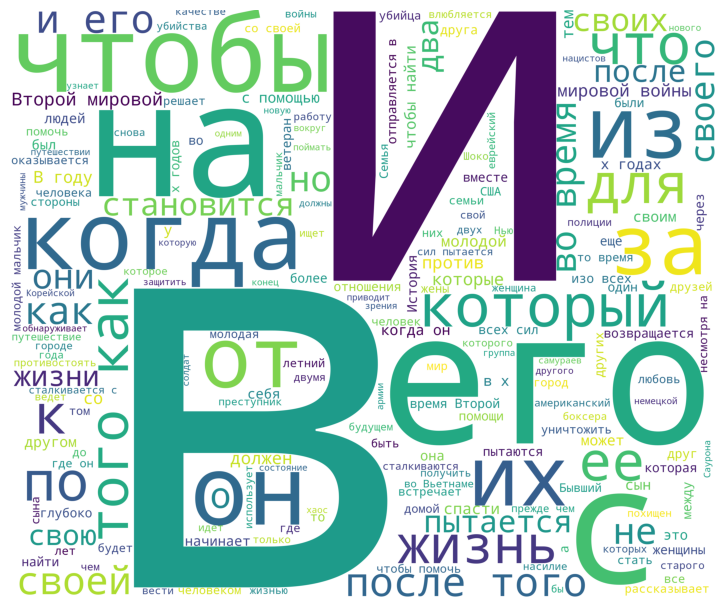

In [268]:
corpus = get_corpus(df['Описание'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

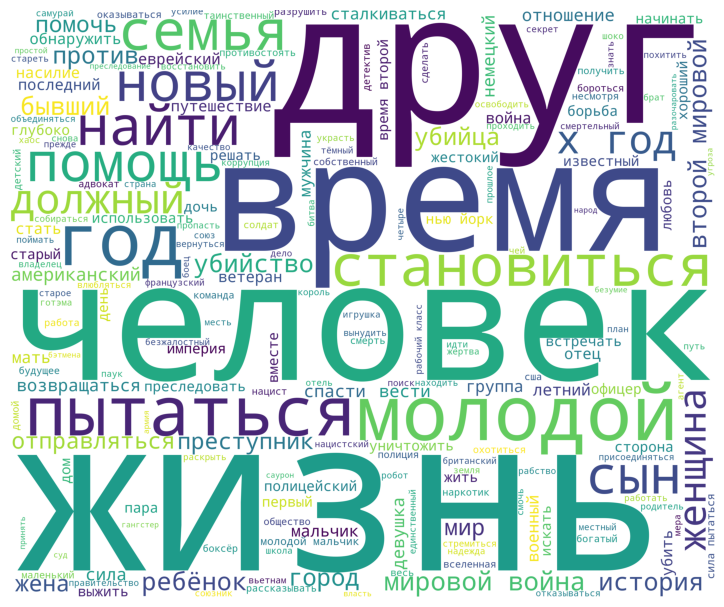

In [269]:
corpus = get_corpus(df['Лемматизированный текст'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [270]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

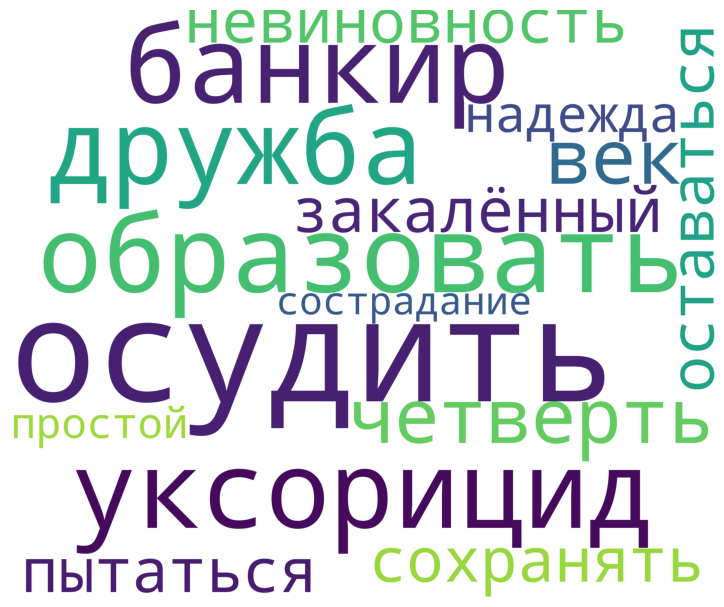

In [271]:
corpus = df['Лемматизированный текст'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

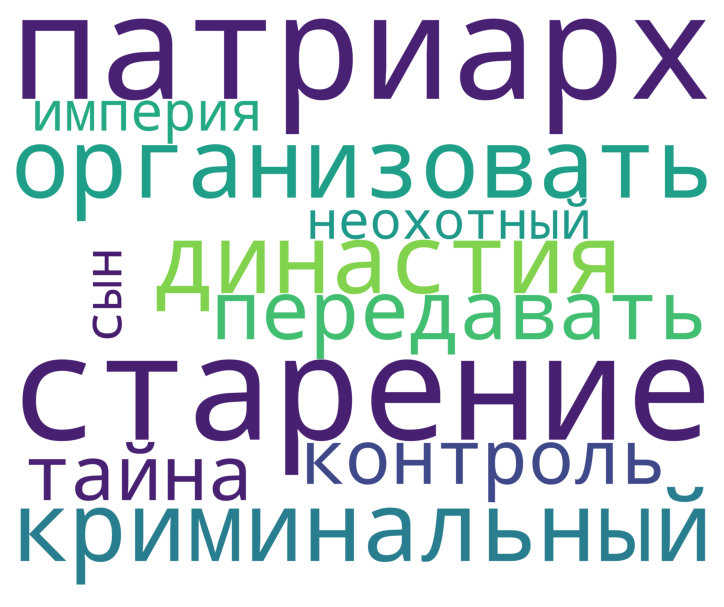

In [272]:
corpus = df['Лемматизированный текст'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [273]:
df['Лемматизированный текст'][1]

'старение патриарх организовать криминальный династия передавать контроль тайна империя неохотный сын'

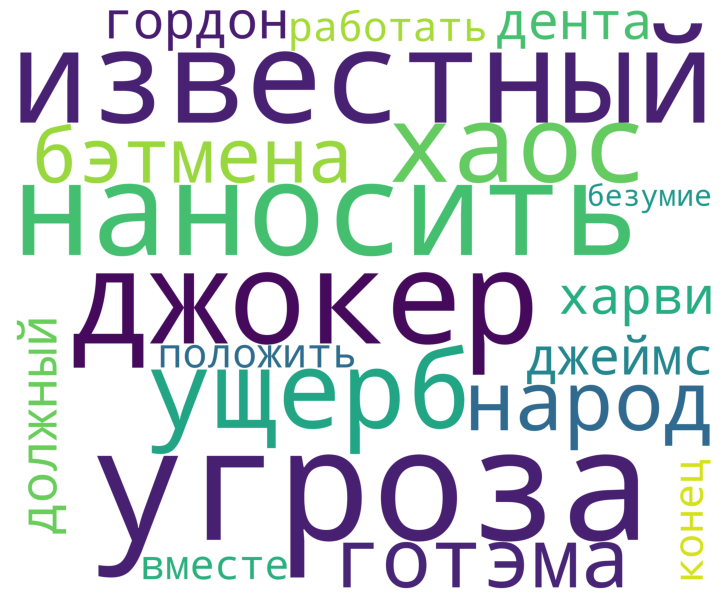

In [274]:
corpus = df['Лемматизированный текст'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [275]:
df['Лемматизированный текст'][2]

'угроза известный джокер наносить ущерб хаос народ готэма бэтмена джеймс гордон харви дента должный работать вместе положить конец безумие'

# Векторизация текстовых данных

Векторизация текста или преобразование текста в численную форму. Алгоритмы машинного обучения не умеют работать с текстом, поэтому необходимо превратить текст в цифры.

1. Прямое кодирование (one-hot encoding) 

Прямое кодирование (one-hot encoding) считается самым простым способом преобразования токенов в тензоры и выполняется следующим образом:

1. каждый токен представляет бинарный вектор (значения 0 или 1);
2. единица ставится тому элементу, который соответствует номеру токена в словаре.

Проблемой прямого кодирования является размерность. 

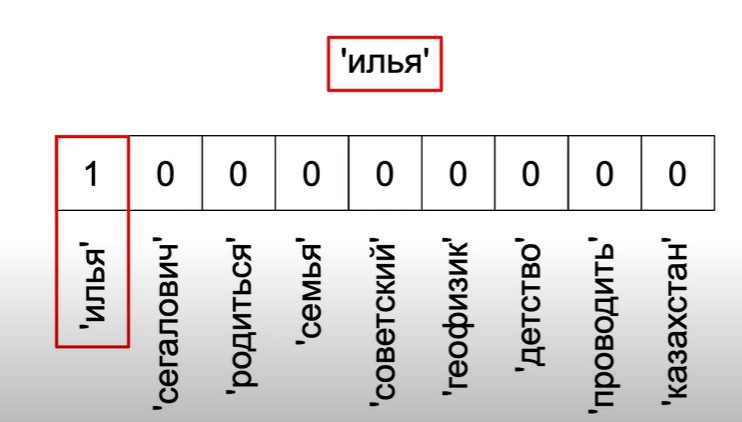

2. Bag of words

В отличие от прямого кодирования, мешок слов (Bag of words) выделяет вектору весь документ, и каждый элемент кодируется 1 по порядку следования слов в словаре.

Bag of words решает проблему размерности по одной оси. Количество строк определяется количеством документов. Однако, этот метод не учитывает важность того или иного токена, ведь одно слово может повторятся по несколько раз.

__Мешок слов__ - решает проблему размерности по одной оси. Количество строк определяется количеством документов. Однако, этот метод не учитывает важность того или иного токена, ведь одно слово может повторятся по несколько раз. В пакете scikit-learn есть модуль CountVectorizer, который преобразовывает входной текст в матрицу, значениями которой являются количества вхождения данного ключа(слова) в текст. Таким образом, мы получим матрицу, размерность которой будет равна количеству всех слов, умноженных на количество документов. И элементами матрицы будут числа, которые означают, сколько раз всего слово встретилось в тексте.

In [285]:
from sklearn.feature_extraction.text import CountVectorizer

In [286]:
df['Лемматизированный текст'][0]

'банкир осудить уксорицид образовать дружба четверть век закалённый осудить сохранять невиновность пытаться оставаться надежда простой сострадание'

In [287]:
vectorizer = CountVectorizer()
vectorizer.fit(df['Лемматизированный текст'])

CountVectorizer()

In [288]:
print(vectorizer.vocabulary_)

{'банкир': 68, 'осудить': 1155, 'уксорицид': 1978, 'образовать': 1080, 'дружба': 467, 'четверть': 2094, 'век': 172, 'закалённый': 519, 'сохранять': 1771, 'невиновность': 1002, 'пытаться': 1512, 'оставаться': 1145, 'надежда': 944, 'простой': 1483, 'сострадание': 1768, 'старение': 1805, 'патриарх': 1216, 'организовать': 1131, 'криминальный': 759, 'династия': 430, 'передавать': 1226, 'контроль': 734, 'тайна': 1871, 'империя': 609, 'неохотный': 1030, 'сын': 1866, 'угроза': 1956, 'известный': 585, 'джокер': 421, 'наносить': 961, 'ущерб': 2008, 'хаос': 2044, 'народ': 970, 'готэма': 355, 'бэтмена': 156, 'джеймс': 412, 'гордон': 348, 'харви': 2046, 'дента': 391, 'должный': 448, 'работать': 1518, 'вместе': 208, 'положить': 1319, 'конец': 725, 'безумие': 83, 'ранний': 1546, 'жизнь': 498, 'карьера': 674, 'вить': 198, 'корлеон': 742, 'год': 340, 'изображаться': 597, 'время': 263, 'майкл': 837, 'расширять': 1561, 'подтягивать': 1296, 'власть': 203, 'отношение': 1173, 'синдикат': 1687, 'семейный': 1

In [289]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['Лемматизированный текст'])

In [290]:
count_matrix.shape

(250, 743)

In [291]:
vectorizer.get_feature_names_out()[45000:46000]

array([], dtype=object)

In [292]:
vectorizer.get_feature_names_out()[742]

'японский'

In [293]:
vectorizer.get_feature_names_out()[742]

'японский'

In [294]:
print(count_matrix)

  (0, 374)	1
  (0, 53)	1
  (0, 532)	1
  (0, 328)	1
  (0, 514)	1
  (0, 620)	1
  (1, 423)	1
  (1, 223)	1
  (1, 660)	1
  (2, 686)	1
  (2, 216)	1
  (2, 713)	1
  (2, 337)	1
  (2, 131)	1
  (2, 49)	1
  (2, 154)	1
  (2, 160)	1
  (2, 537)	1
  (2, 73)	1
  (2, 448)	1
  (2, 259)	1
  (2, 22)	1
  (2, 449)	1
  (3, 660)	1
  (3, 179)	1
  :	:
  (247, 342)	1
  (247, 533)	1
  (247, 28)	1
  (247, 605)	1
  (248, 175)	2
  (248, 364)	1
  (248, 12)	1
  (248, 176)	1
  (248, 500)	1
  (248, 214)	1
  (248, 422)	1
  (248, 185)	1
  (248, 565)	1
  (249, 532)	1
  (249, 721)	1
  (249, 644)	1
  (249, 625)	1
  (249, 679)	1
  (249, 534)	1
  (249, 586)	1
  (249, 483)	1
  (249, 680)	1
  (249, 301)	1
  (249, 609)	1
  (249, 194)	1


3. TF-IDF

TF-IDF (от англ. TF — term frequency, IDF — inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

TF-IDF состоит из двух компонентов: Term Frequency (частотность слова в документе) и Inverse Document Frequency (инверсия частоты документа). Они считаются следующим образом:

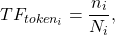

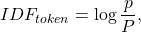

где n_i — сколько раз встречается токен в i-ом документе,  
N_i — общее количество токенов в i-ом документе,   
p — количество документов, в которых встречается токен,   
P — общее количеств документов.   
В конечном счете, TF-IDF – это произведение TF на IDF

 В TF-IDF редкие слова и слова, которые встречаются во всех документах, несут мало информации. 

__TF-IDF__ - это способ векторизации текста, отражающий важность слова в документе, а не только частоту его появления. В тексте большого объема некоторые слова могут присутствовать очень часто, но при этом не нести никакой значимой информации о фактическом содержании текста (документа). Если такие данные передавать непосредственно классификатору, то такие частые термины могут затенять частоты более редких, но при этом более интересных терминов. Для того, чтобы этого избежать, достаточно разделить количество употреблений каждого слова в документе на общее количество слов в документе, это есть TF — частота термина. Термин IDF (inverse document frequency) обозначает обратную частоту термина (инверсия частоты) с которой некоторое слово встречается в документах. IDF позволяет измерить непосредственную важность термина.


In [303]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [304]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [305]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Лемматизированный текст'])

CPU times: total: 15.6 ms
Wall time: 15.9 ms


In [306]:
tfidf_matrix.shape

(250, 329)

In [307]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['агент', 'адвокат', 'американский', 'англия', 'анджелес', 'армия',
       'банда', 'бандит', 'безжалостный', 'безумие', 'битва', 'близкий',
       'бог', 'богатый', 'боевой', 'боец', 'боксёр', 'бороться', 'борьба',
       'брат', 'британский', 'бродяга', 'будущее', 'бывший', 'бэтмена',
       'век', 'вернуться', 'вести', 'весь', 'ветеран', 'взять',
       'владелец', 'власть', 'влюбляться', 'вместе', 'военный',
       'возвращаться', 'воин', 'война', 'вокруг', 'волшебный',
       'восстановить', 'время', 'время второй', 'время второй мировой',
       'вселенная', 'вскоре', 'встречать', 'второй', 'второй мировой',
       'второй мировой война', 'выжить', 'выйти', 'вынудить', 'выполнить',
       'высокий', 'вьетнам', 'гангстер', 'глубоко', 'го', 'го век', 'год',
       'город', 'готэма', 'гражданский', 'группа', 'дарт', 'девочка',
       'девушка', 'действие', 'дело', 'день', 'депрессия', 'детектив',
       'детский', 'джон', 'должный', 'дом', 'домой', 'дочь', 'друг',
       'друг

In [321]:
tfidf_vectorizer.get_feature_names_out()[328]

'являться'

In [330]:
tfidf_vectorizer.get_feature_names_out()[328]

'являться'

In [331]:
print(tfidf_matrix)

  (0, 228)	0.5609971780776377
  (0, 151)	0.5366385402397056
  (0, 235)	0.36095022211117994
  (0, 25)	0.5167360839695784
  (1, 298)	0.6470474266006888
  (1, 103)	0.7624497542326485
  (2, 205)	0.29149030132868714
  (2, 9)	0.29149030132868714
  (2, 116)	0.2684925391957195
  (2, 204)	0.29149030132868714
  (2, 34)	0.2684925391957195
  (2, 239)	0.2788337195118842
  (2, 76)	0.21286043324444107
  (2, 24)	0.29149030132868714
  (2, 63)	0.2788337195118842
  (2, 155)	0.29149030132868714
  (2, 317)	0.2788337195118842
  (2, 101)	0.259749195819409
  (2, 310)	0.29149030132868714
  (3, 182)	0.46366168327191193
  (3, 32)	0.5505326239056765
  (3, 42)	0.33117342397087723
  (3, 61)	0.32127792735627775
  (3, 89)	0.30936287554122055
  (3, 298)	0.4163303272245673
  :	:
  (246, 61)	0.20859449857025675
  (246, 239)	0.3419213374335014
  (247, 15)	0.364888551238905
  (247, 157)	0.364888551238905
  (247, 247)	0.3814512604078478
  (247, 127)	0.3399140818188426
  (247, 269)	0.3399140818188426
  (247, 307)	0.31344007

### Кластеризация

*Определяем кол-во кластеров для метода K-means*

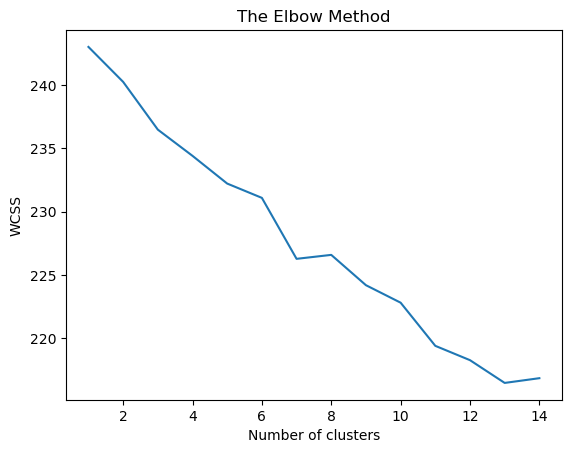

In [337]:
from sklearn.cluster import KMeans
X = tfidf_matrix
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [340]:
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=28)
kmeans.fit(X)
pred=kmeans.fit_predict(X)

In [341]:
df['Кластер'] = pd.Series(pred)

In [342]:
df

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст,Стеммингированный текст,Лемматизированный текст,Кластер
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...,банкир осужден уксорицид образ дружб четверт в...,банкир осудить уксорицид образовать дружба чет...,5
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старен патриарх организова криминальн династ п...,старение патриарх организовать криминальный ди...,2
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...,угроз известн джокер нанос ущерб хаос народ го...,угроза известный джокер наносить ущерб хаос на...,1
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...,ран жизн карьер вит корлеон х год изобража вре...,ранний жизнь карьера вить корлеон х год изобра...,2
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...,присяжн суд дел убийств нью йорк разочарова од...,присяжный суд дело убийство нью йорк разочаров...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,Форма голоса,2016,2h 10m,"Animation, Drama",8.1,Japan,"Глухая девушка, Шоко, издевается популярной Ша...","Анимация, драма",глухая девушка шоко издевается популярной шайе...,глухая девушка шоко издевается популярной шайе...,глух девушк шок издева популярн шай шо продолж...,глухой девушка шоко издеваться популярный шайя...,1
246,246,Прислуга,2011,2h 26m,Drama,8.1,"United States, India",Начинающий автор во время движения за гражданс...,Драма,начинающий автор во время движения за гражданс...,начинающий автор время движения гражданские пр...,начина автор врем движен гражданск прав х год ...,начинающий автор время движение гражданский пр...,1
247,247,Сука любовь,2000,2h 34m,"Drama, Thriller",8.0,Mexico,"Любительский боец ​​собаки, супермодель и забр...","Драма, триллер",любительский боец ​​собаки супермодель и забро...,любительский боец ​​собаки супермодель заброше...,любительск боец ​​собак супермодел заброшен уб...,любительский боец ​​собака супермодель заброси...,0
248,248,Ребекка,1940,2h 10m,"Drama, Mystery, Romance",8.1,United States,Самосознательная женщина жонглирует приспособл...,"Драма, тайна, романтика",самосознательная женщина жонглирует приспособл...,самосознательная женщина жонглирует приспособл...,самосознательн женщин жонглир приспособлен сво...,самосознательный женщина жонглировать приспосо...,5


#### Вывод облака слов и присвоение названия каждому кластеру по данным из облаков

In [344]:
def get_cloudwords_by_claster(claster):
    claster_df = df[df['Кластер'] == claster]
    corpus = get_corpus(claster_df['Лемматизированный текст'].values)
    return WordCloud(background_color='white',
                          stopwords=STOPWORDS,
                          width=2500,
                          height=2000,
                          max_words=200,
                          random_state=42
                         ).generate(str_corpus(corpus))
    

			1 кластер


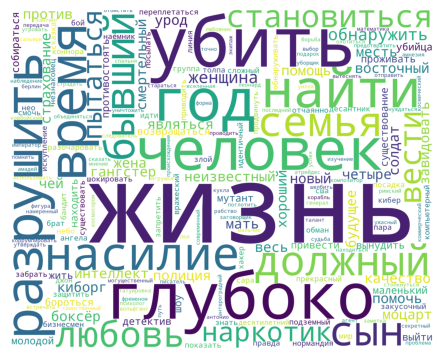

			2 кластер


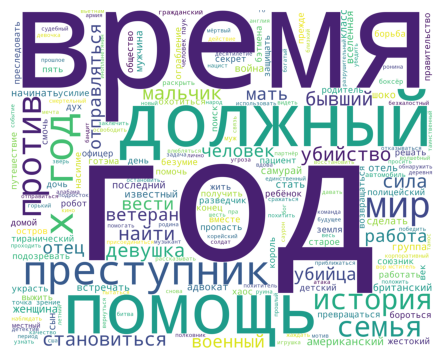

			3 кластер


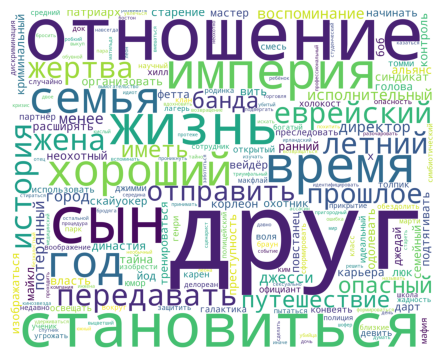

			4 кластер


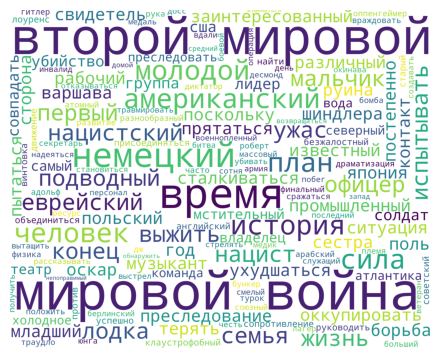

			5 кластер


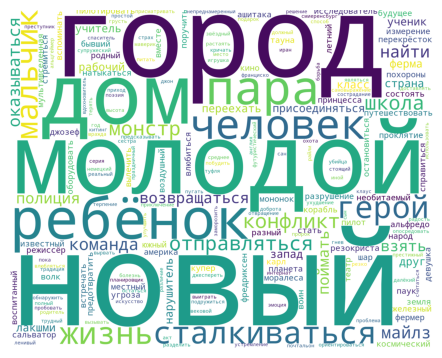

			6 кластер


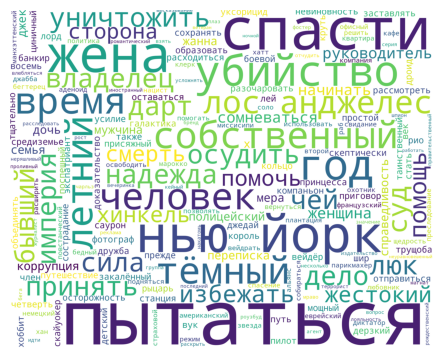

			7 кластер


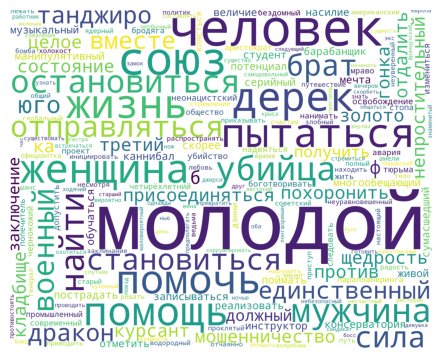

In [345]:
for i in range(df["Кластер"].nunique()):
    print(f"\t\t\t{i+1} кластер")
    cloud = get_cloudwords_by_claster(i)
    fig = plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

In [346]:
# Даем название
names = {0: "Преступление", 1: "Человеческая жизнь", 2: "2-ая Мировая Война", 3: "Друзья", 4: "Новый год", 5: "Борьба", 6: "Детектив"}
def give_cluster_name():
    df["Категория кластера"] = df['Кластер'].map(names)
give_cluster_name()

In [347]:
df

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст,Стеммингированный текст,Лемматизированный текст,Кластер,Категория кластера
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...,банкир осужден уксорицид образ дружб четверт в...,банкир осудить уксорицид образовать дружба чет...,5,Борьба
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старен патриарх организова криминальн династ п...,старение патриарх организовать криминальный ди...,2,2-ая Мировая Война
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...,угроз известн джокер нанос ущерб хаос народ го...,угроза известный джокер наносить ущерб хаос на...,1,Человеческая жизнь
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...,ран жизн карьер вит корлеон х год изобража вре...,ранний жизнь карьера вить корлеон х год изобра...,2,2-ая Мировая Война
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...,присяжн суд дел убийств нью йорк разочарова од...,присяжный суд дело убийство нью йорк разочаров...,5,Борьба
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,Форма голоса,2016,2h 10m,"Animation, Drama",8.1,Japan,"Глухая девушка, Шоко, издевается популярной Ша...","Анимация, драма",глухая девушка шоко издевается популярной шайе...,глухая девушка шоко издевается популярной шайе...,глух девушк шок издева популярн шай шо продолж...,глухой девушка шоко издеваться популярный шайя...,1,Человеческая жизнь
246,246,Прислуга,2011,2h 26m,Drama,8.1,"United States, India",Начинающий автор во время движения за гражданс...,Драма,начинающий автор во время движения за гражданс...,начинающий автор время движения гражданские пр...,начина автор врем движен гражданск прав х год ...,начинающий автор время движение гражданский пр...,1,Человеческая жизнь
247,247,Сука любовь,2000,2h 34m,"Drama, Thriller",8.0,Mexico,"Любительский боец ​​собаки, супермодель и забр...","Драма, триллер",любительский боец ​​собаки супермодель и забро...,любительский боец ​​собаки супермодель заброше...,любительск боец ​​собак супермодел заброшен уб...,любительский боец ​​собака супермодель заброси...,0,Преступление
248,248,Ребекка,1940,2h 10m,"Drama, Mystery, Romance",8.1,United States,Самосознательная женщина жонглирует приспособл...,"Драма, тайна, романтика",самосознательная женщина жонглирует приспособл...,самосознательная женщина жонглирует приспособл...,самосознательн женщин жонглир приспособлен сво...,самосознательный женщина жонглировать приспосо...,5,Борьба


In [348]:
df0 = df[df['Кластер']==0]
df1 = df[df['Кластер']==1]
df2 = df[df['Кластер']==2]
df3 = df[df['Кластер']==3]
df4 = df[df['Кластер']==4]
df5 = df[df['Кластер']==5]
df6 = df[df['Кластер']==6]

In [349]:
pip install pyLDAvis


Note: you may need to restart the kernel to use updated packages.


In [350]:
from sklearn.decomposition import TruncatedSVD

In [351]:
lsa_model = TruncatedSVD(n_components=11, random_state=0)
lsa_model.fit(tfidf_matrix)

TruncatedSVD(n_components=11, random_state=0)

In [352]:
def print_about(df):
    name = df.Название[:3]
    desc = df.Описание[:3]
    films_dict = dict(zip(name, desc))
    for name, desc in films_dict.items():
        print(f"Название фильма: {name}\n\nОписание фильма: {desc}\n")

    
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Токенизированный текст'])
    lsa_model.fit(tfidf_matrix)
    
    # вывод топ слов для каждой темы
    for i, topic in enumerate(lsa_model.components_):
        print(f"Тема {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

In [353]:
print_about(df0)

Название фильма: Криминальное чтиво

Описание фильма: Жизнь двух наемников толпы, боксера, гангстера и его жены, и пары закусочных бандитов переплетаются в четырех сказках о насилии и искуплении.

Название фильма: Матрица

Описание фильма: Когда прекрасный незнакомец приводит компьютерного хакера Нео к запрещенному подземному миру, он обнаруживает шокирующую правду-жизнь, которую он знает,-это сложный обман злой кибер-интеллекты.

Название фильма: Эта замечательная жизнь

Описание фильма: Ангела посылают с небес, чтобы помочь отчаянно разочарованному бизнесмену, показав ему, какая жизнь была бы, если бы он никогда не существовал.

Тема 0: жизнь, своего, своей, сына, найти, шоу, боксера, своего сына, противостоять, жизни
Тема 1: жизни, найти, пытается, глубоко, наркотиков, смертельную, космического корабля, таинственной передачи, таинственной передачи неизвестного, неизвестного происхождения
Тема 2: глубоко, моцарта, жизнь, четырех, убил, айленда разрушены пристрастия, кони, пристрастия

In [354]:
print_about(df1)

Название фильма: Тёмный рыцарь

Описание фильма: Когда угроза, известная как Джокер, наносит ущерб и хаос народах Готэма, Бэтмен, Джеймс Гордон и Харви Дент должны работать вместе, чтобы положить конец безумию.

Название фильма: Властелин колец: Возвращение короля

Описание фильма: Гандальф и Арагорн ведут мир людей против армии Саурона, чтобы привлечь свой взгляд от Фродо и Сэма, когда они приближаются к Маунт -Дум с одним кольцом.

Название фильма: Форрест Гамп

Описание фильма: История Соединенных Штатов с 1950 -х годов до 70 -х годов разворачивается с точки зрения мужчины из Алабамы с IQ из 75 лет, который жаждет воссоединиться со своей детской возлюбленной.

Тема 0: время, своей, своих, становится, годов, помощью, история, должен, своего, против
Тема 1: своих, защищает, группа, уничтожить, борьбы, вьетнаме, помочь, ищет, силы, обучая своих
Тема 2: история, своей, семьи, матерью, мальчик, своего, своих, найти своего, землю, мир
Тема 3: история, время, годов, своих, семьи, зрения, б

In [355]:
print_about(df2)

Название фильма: Крёстный отец

Описание фильма: Старение патриарха организованной криминальной династии передает контроль над его тайной империей его неохотному сыну.

Название фильма: Крёстный отец 2

Описание фильма: Ранняя жизнь и карьера Вито Корлеоне в 1920 -х годах изображаются, в то время как его сын Майкл расширяет и подтягивает свою власть в отношении синдиката по семейной преступности.

Название фильма: Звёздные войны. Эпизод 5: Империя наносит ответный удар

Описание фильма: После того, как Империя одолевает альянс повстанцев, Люк Скайуокер начинает тренироваться с мастером Джедай Йода, в то время как Дарт Вейдер и охотник за головами Боба Фетт преследуют своих друзей через галактику.

Тема 0: друг, друга, друг друга, отношения, город, другом, джесси, становятся, процедуру навсегда, процедуру
Тема 1: становится, исполнительный, исполнительный директор, директор, сын, исполнительный директор обувной, компании, компании становится, жертвой вымогательства сын, жертвой вымогате

In [356]:
print_about(df3)

Название фильма: Список Шиндлера

Описание фильма: В оккупированной немецкой Поль году во время Второй мировой войны промышленный Оскар Шиндлер постепенно заинтересован в своей еврейской рабочей силе после того, как нацисты были свидетелем их преследования со стороны нацистов.

Название фильма: Пианист

Описание фильма: Во время Второй мировой войны известный польский музыкант Wladyslaw сталкивается с различной борьбой, поскольку он теряет контакт со своей семьей. Когда ситуация ухудшается, он прячется в руинах Варшавы, чтобы выжить.

Название фильма: Могила светлячков

Описание фильма: Молодой мальчик и его младшая сестра изо всех сил пытаются выжить в Японии во время Второй мировой войны.

Тема 0: время второй, время второй мировой, время, второй мировой войны, выжить, молодой мальчик, молодой, сил, мальчик, японии время второй
Тема 1: лодка, мировой войне, второй мировой войне, войне, испытывает, сил, мальчик, молодой мальчик, молодой, молодая
Тема 2: молодой мальчик, молодой, сил, 

In [357]:
print_about(df4)

Название фильма: Интерстеллар

Описание фильма: Когда в будущем Земля станет необитаемой, фермеру и бывшему пилоту на NASA Джозеф Купер поручено пилотировать космический корабль вместе с командой исследователей, чтобы найти новую планету для людей.

Название фильма: Человек-паук: Паутина вселенных

Описание фильма: Путешествуя по мультивселенной, Майлз Моралес встречает новую команду пауков, состоящую из героев из разных измерений. Но когда герои сталкиваются с тем, как справиться с новой угрозой, Майлз оказывается на перекрестке.

Название фильма: Новый кинотеатр «Парадизо»

Описание фильма: Сальваторе, известный режиссер, возвращается в свой родной город на похороны резокриста местного театра Альфредо. Он вспоминает о своей жизни, когда молодой мальчик влюбился в кино.

Тема 0: своей, мальчик, молодой, своей жизни, жизни, молодой мальчик, пару, городе, школе, город
Тема 1: городе, пара, ребенка, детей, мало внимания, внимания, мало, старая пара посещает, посещает детей внуков, посеща

In [358]:
print_about(df5)

Название фильма: Побег из Шоушенка

Описание фильма: Банкир, осужденный за уксорицид, образует дружбу за четверть века с закаленным осужденным, сохраняя при этом его невиновность и пытаясь оставаться надежды на простое сострадание.

Название фильма: 12 рaзгневанных мужчин

Описание фильма: Присяжные в суде по делу об убийстве в Нью -Йорке разочарованы одним членом, чей скептически осторожность заставляет их более тщательно рассмотреть доказательства, прежде чем принять поспешное приговор.

Название фильма: Властелин колец: Братство кольца

Описание фильма: Крутый хоббит из Шира и восемь компаньонов отправился в путешествие, чтобы уничтожить мощное кольцо и спасти Средиземье от Темного лорда Саурона.

Тема 0: пытается, спасти, время, темной, стороны, темной стороны, пытается спасти, сил, изо сил пытается, изо
Тема 1: нью, нью йорке, йорке, сомневаться, начинает сомневаться, начинает, лос, агент группой иностранных, группой иностранных, нью йорке идет
Тема 2: начинает, начинает сомневать

In [362]:
print_about(df6)

Название фильма: Хороший, плохой, злой

Описание фильма: Мошенничество на щедрости присоединяется к двум мужчинам в непростительном союзе против третьего в гонке, чтобы найти целое состояние в золоте, похороненное на отдаленном кладбище.

Название фильма: Молчание ягнят

Описание фильма: Молодой Ф.Б.И. Ка курсант должен получить помощь в заключении и манипулятивном убийце каннибала, чтобы помочь поймать другого серийного убийцы, сумасшедшего, который скорее пострадает.

Название фильма: Одержимость

Описание фильма: Многообещающий молодой барабанщик записывается в музыкальную консерваторию, где его мечты о величии обучаются инструктором, который не остановится ни перед чем, чтобы реализовать потенциал студента.

Тема 0: изо сил пытается, изо сил, сил пытается, изо, сил, пытается, молодой, промышленном обществе, современном, современном промышленном
Тема 1: людей, молодых людей, молодых, дерек, молодой, двух, становится, молодого, французских пригородах следующий, жестокого
Тема 2: стан

In [231]:
# Даем название
names = {0: "Приключение", 1: "Борьба", 2: "Драма", 3: "2-я Мировая Война", 4: "Фантастика", 5: "Тюрьма", 6: "Преступление"}
def give_cluster_name():
    df["Категория кластера Моделирование"] = df['Кластер'].map(names)
give_cluster_name()

In [ ]:
df